In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import sqlite3

In [3]:
con=sqlite3.connect(r"D:\moha\job\data analyst\python\course 3\zomato\zomato_rawdata.sqlite")

In [4]:
df=pd.read_sql_query("select *from Users",con)

In [5]:
df.shape

(51717, 18)

In [6]:
df.columns


Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## 2.. Dealing  with missing values ? 

In [7]:
df.isnull().sum()/len(df)*100



index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [8]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df["rate"].replace(('-',"NEW"),np.nan,inplace=True)

In [10]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
## we need rating as 4.1 not as '4.1/5' , ie we need to fix it ..

In [12]:
'4.1/5'.split("/")[0]

'4.1'

In [13]:
type('4.1/5'.split("/")[0])

str

In [14]:
float('4.1/5'.split("/")[0])

4.1

In [15]:
df['rate'] =df["rate"].apply(lambda x:float(x.split("/")[0]) if type (x)==str else x)

In [16]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

## 3.. Is there a relation between online order option and rating of the restaurant ?

In [17]:
x = pd.crosstab(df['rate'] , df['online_order'])

In [18]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

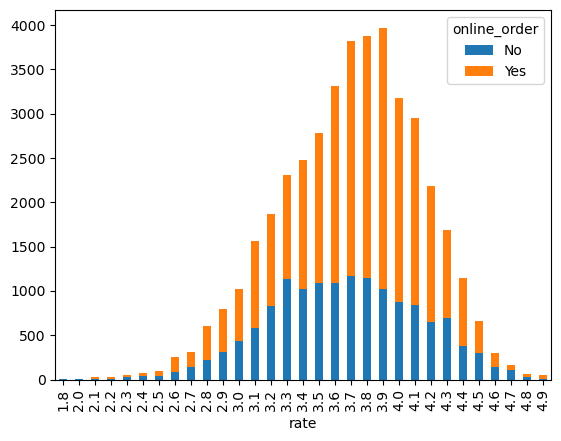

In [19]:
x.plot(kind="bar",stacked=True)

In [20]:
###  modifying  above visual & get better results/inferences.

In [21]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [22]:
normlaize=x.div(x.sum(axis=1).astype(float),axis=0)

<Axes: xlabel='rate'>

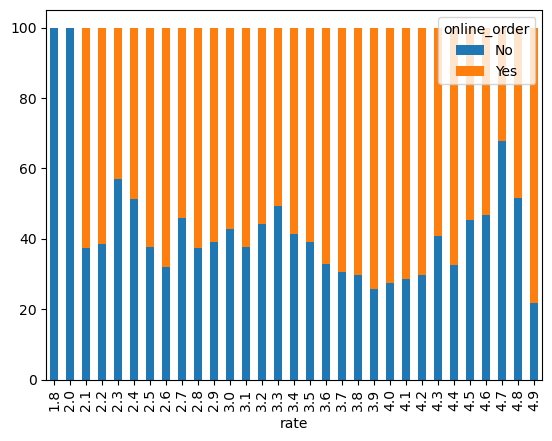

In [23]:
(normlaize*100).plot(kind="bar",stacked =True)

## 4.. Data Cleaning to perform Text Analysis 

In [24]:
df['rest_type'].isnull().sum()

227

In [25]:
data=df.dropna(subset=['rest_type'])

In [26]:
data['rest_type'].isnull().sum()

0

In [27]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [ ]:
## we need whole data of 'Quick Bites' restaurant only 

In [47]:
quick_Bites_df=data[data['rest_type'].str.contains("Quick Bites")]

In [48]:
quick_Bites_df.shape

(20639, 18)

In [49]:
quick_Bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
### Perform Lower-case operation

In [50]:
quick_Bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [52]:
quick_Bites_df['reviews_list']=quick_Bites_df['reviews_list'].apply(lambda x:x.lower())

C:\Users\user\AppData\Local\Temp\ipykernel_14156\2754502288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_Bites_df['reviews_list']=quick_Bites_df['reviews_list'].apply(lambda x:x.lower())


In [53]:
#### b) Do tokenization

In [54]:
from nltk.corpus import RegexpTokenizer

In [56]:
tokenizer =RegexpTokenizer("[a-zA-Z]+")

In [73]:
print(tokenizer.tokenize(quick_Bites_df['reviews_list'][3]))

['rated', 'rated', 'n', 'great', 'food', 'and', 'proper', 'karnataka', 'style', 'full', 'meals', 'been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'rated', 'rated', 'n', 'reached', 'the', 'place', 'at', 'pm', 'on', 'saturday', 'half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'what', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'the', 'taste', 'was', 'also', 'very', 'average', 'only', 'dosa', 'and', 'holige', 'were', 'good', 'there', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'the', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'had', 'to', 'call', 'them', 'repeatedly', 'rated', 'rated', 'n', 'had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [58]:
sample=quick_Bites_df[0:1000]

In [60]:
reviews_tokens=sample["reviews_list"].apply(tokenizer.tokenize)

## 5.. Performing Unigram analysis & removal of stopwords ..

In [61]:
reviews_tokens

3       [rated, rated, n, great, food, and, proper, ka...
23      [rated, rated, n, so, went, here, with, friend...
26      [rated, rated, n, please, provide, some, extra...
31      [rated, rated, n, worst, restaurant, ever, veg...
34      [rated, rated, n, not, worth, for, the, money,...
                              ...                        
2209                                                   []
2210                                                   []
2211    [rated, rated, n, went, for, breakfast, on, a,...
2212    [rated, rated, n, very, bad, quality, of, food...
2213                                                   []
Name: reviews_list, Length: 1000, dtype: object

In [67]:
 import nltk

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [69]:
from nltk.corpus import stopwords

In [70]:
stop = stopwords.words('english')

In [72]:
print(stop) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [74]:
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [75]:
## remove stopwords from "reviews_tokens" Series
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [76]:
reviews_tokens_clean

3       [great, food, proper, karnataka, style, full, ...
23      [went, friends, tea, ambience, striking, say, ...
26      [please, provide, extra, sambal, quantity, les...
31      [worst, restaurant, ever, veg, manchurian, wor...
34      [worth, money, pay, ambience, good, enough, se...
                              ...                        
2209                                                   []
2210                                                   []
2211    [went, breakfast, saturday, morning, serve, am...
2212    [bad, quality, food, hygiene, ordered, online,...
2213                                                   []
Name: reviews_list, Length: 1000, dtype: object

In [77]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [78]:
total_reviews_2D = list(reviews_tokens_clean)

In [81]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [82]:
from nltk import FreqDist

In [84]:
fd = FreqDist()

In [85]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [86]:
fd.most_common(20)

[('good', 9539),
 ('food', 9381),
 ('place', 6212),
 ('chicken', 3860),
 ('taste', 3712),
 ('ordered', 2776),
 ('order', 2265),
 ('service', 2253),
 ('one', 2246),
 ('like', 2231),
 ('time', 2028),
 ('also', 2011),
 ('restaurant', 1833),
 ('try', 1827),
 ('delivery', 1769),
 ('quality', 1708),
 ('biryani', 1660),
 ('best', 1653),
 ('really', 1615),
 ('nice', 1614)]

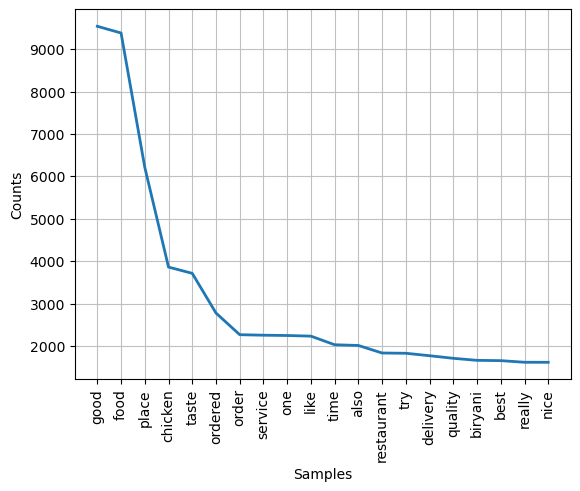

<Axes: xlabel='Samples', ylabel='Counts'>

In [88]:
fd.plot(20)

## 6.. Performing Bi-gram on data

In [89]:
from nltk import FreqDist , bigrams , trigrams

In [90]:
bi_grams = bigrams(total_reviews_1D)

In [91]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

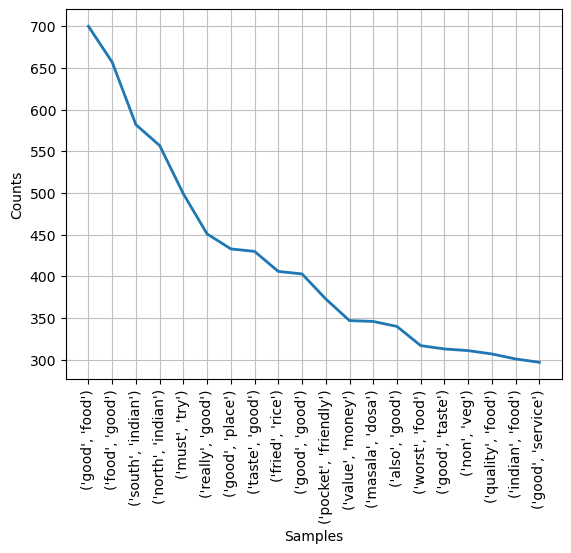

<Axes: xlabel='Samples', ylabel='Counts'>

In [92]:
fd_bigrams.plot(20)

## 7.. Extract geographical-coordinates from data ..

In [93]:
!pip install geocoder
!pip install geopy

     ---------------------------------------- 98.6/98.6 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 125.4/125.4 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00


In [94]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [95]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [96]:
len(df['location'].unique())

94

In [97]:
### Lets add 'Bangalore , Karnataka , India' so that u will get more more accurate geographical co-ordinates..

df['location'] = df['location'] + " , Bangalore  , Karnataka , India "

In [98]:
df_copy = df.copy()

In [99]:
df_copy['location'].isnull().sum()

21

In [100]:
df_copy = df_copy.dropna(subset=['location'])

In [101]:
locations = pd.DataFrame(df_copy['location'].unique())

In [102]:
locations

,0
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , ..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [104]:
locations.columns=['name']


In [105]:
locations

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , ..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [106]:
from geopy.geocoders import Nominatim

In [107]:
geolocator = Nominatim(user_agent="app" , timeout=None)

In [108]:
lat=[]
lon=[]

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    

In [109]:
locations['latitude'] = lat
locations['longitude'] = lon

In [110]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009476,77.553089
89,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061
